# Fitting Gaussian Process Experts using GPFlow

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline
np.random.seed(42)
sns.set_style("dark")

We will use the synthetic control timeseries dataset, as such.

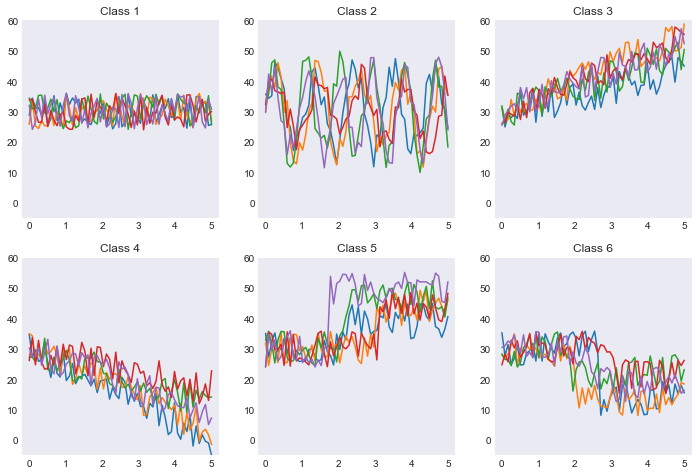

In [2]:
# load the data
data = pd.read_csv('utils/synthetic_control.data', header=-1)

# a useful function for displaying the different classes of the data
def plot_synthetic_control(data,class_=1):
    x=np.linspace(0,5,60)
    
    if class_==1:
        s = range(0,99,20)
    elif class_==2:
        s = range(100,199,20)
    elif class_==3:
        s = range(200,299,20)
    elif class_==4:
        s = range(300,399,20)
    elif class_==5:
        s = range(400,499,20)
    else:
        s = range(500,599,20)
        
    for i in s:
        plt.plot(x, data.iloc[i])
    
    plt.xlim(-.2, 5.2)
    plt.ylim(-5, 60)


# display the data
plt.figure(figsize=(12,8))
for c in range(1,7):
    plt.subplot(2, 3, c)
    plot_synthetic_control(data,c)
    plt.title('Class ' + str(c))

Let's fit a GP to an example time series.

In [3]:
import gpflow

# build an helper function
def perform_gpr(data, index):
    # select data points
    x = np.linspace(0,5,60)
    y = data.iloc[index]
    
    # reshape them for the gp flow
    Y = y.reshape(-1,1)
    X = x.reshape(-1,1)
    
    k = gpflow.kernels.RBF(1, lengthscales=1, variance=.1)
    meanf = gpflow.mean_functions.Constant(30)
    
    m = gpflow.gpr.GPR(X, Y, kern=k, mean_function=meanf)
    
    m.likelihood.variance = 10
    m.likelihood.variance.fixed = True
    
    m.optimize()
    
    return m, X, Y

def plot(m):
    mean, var = m.predict_y(xx)
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx, mean, 'b', lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.xlim(0, 5)
    plt.ylim(-5, 60)

In [60]:
clf = dict()
m1, X, Y = perform_gpr(data,102)
xx = np.linspace(0,5,500).reshape(-1,1)
plt.figure(figsize=(10,8))
print(m1)
plot(m1)

C:\Users\mpimentel\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


Let's create a class label for each time series!

In [4]:
labels = [np.ones(100), 2*np.ones(100), 3*np.ones(100), 4*np.ones(100), 5*np.ones(100), 6*np.ones(100)]
labels = np.hstack(labels)

Lets focus on the first 4 classes of the data to demonstrate the creation of GP experts.

In [5]:
# create indices for the time series
nsample = np.random.permutation(400)

In [6]:
Ntr = 280
Nte = 120
ntrain = nsample[:Ntr]
ntest = nsample[-Nte:]

In [7]:
# define number of 
G = 1
ntheta = 3  # number of parameters
params = np.random.uniform(0,100,ntheta)  # mean function parameter, lenghtscales, variance


In [61]:
m1.get_free_state()

array([  -1.27086836,  114.79842404,   13.744071  ,   32.02422828])

In [8]:
m1, X, Y = perform_gpr(data,0)
m1

C:\Users\mpimentel\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


In [9]:
#np.log(np.exp(m1.get_free_state()[0])+1)
m1.get_free_state()

array([ -0.5212001 ,  -4.39672798,  30.11852539])

In [10]:
m1.compute_log_likelihood()

-161.33367554134546

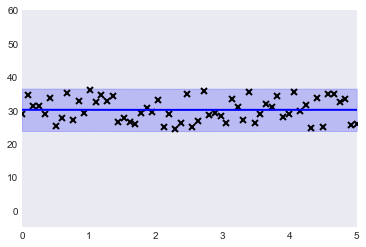

In [11]:
xx = np.linspace(0,5,10000).reshape(-1,1)
plot(m1)

In [12]:
f = np.transpose(data.iloc[ntrain])
ff = f.values

#Y = m.reshape(-1,1)
#np.hstack(y.reshape(-1,1))
f.columns[0]

209

In [13]:
Y = ff[:,0:3]
Y

array([[ 35.3004,  25.4755,  28.1731],
       [ 32.6963,  28.618 ,  28.4389],
       [ 26.872 ,  30.6357,  32.2253],
       [ 36.7859,  31.7309,  33.9017],
       [ 29.2162,  32.6194,  35.7554],
       [ 33.5323,  30.4798,  34.0295],
       [ 38.1741,  37.9551,  32.4651],
       [ 34.5968,  34.1946,  25.0392],
       [ 27.9764,  37.9452,  30.2963],
       [ 33.2321,  29.9011,  27.1779],
       [ 31.1204,  36.0459,  35.5854],
       [ 37.3244,  30.1416,  28.5223],
       [ 39.475 ,  31.9371,  27.4948],
       [ 40.4809,  39.0302,  30.5229],
       [ 32.9652,  31.6419,  35.2035],
       [ 37.9257,  32.2799,  29.3115],
       [ 35.1615,  40.19  ,  24.625 ],
       [ 43.2849,  36.601 ,  33.331 ],
       [ 41.7152,  36.3015,  30.0125],
       [ 41.9863,  36.3028,  29.5685],
       [ 41.577 ,  38.662 ,  26.4883],
       [ 42.7111,  43.1816,  29.4521],
       [ 34.7162,  40.7122,  31.7465],
       [ 37.4503,  39.3214,  32.2881],
       [ 40.1352,  38.2596,  35.8564],
       [ 36.1661,  37.385

In [14]:
x = np.linspace(0,5,60)
X = x.reshape(-1,1)

k = gpflow.kernels.RBF(1, lengthscales=1, variance=.1)
meanf = gpflow.mean_functions.Constant(30)
m = gpflow.gpr.GPR(X, Y, kern=k, mean_function=meanf)
m.likelihood.variance = 10
m.likelihood.variance.fixed = True
    
m.optimize()

      fun: 502.47149215213096
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -6.21453698e-06,  -2.73175865e-07,   2.66720267e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 25
   status: 0
  success: True
        x: array([   5.88361023,  285.75590175,   39.08786117])

In [16]:
val = m.compute_log_likelihood()
val

-502.47149215213096

In [21]:
m.highest_parent

In [255]:
print(m)

name.kern.lengthscales transform:+ve prior:None
[ 6.92758352]
name.kern.variance transform:+ve prior:None
[ 353.68174679]
name.likelihood.variance transform:+ve prior:None [FIXED]
[ 10.]
name.mean_function.c transform:(none) prior:None
[ 43.65821115]


This model is fit using the optimize method, which runs a gradient ascent algorithm on the model likelhiood (it uses the minimize function from SciPy as a default optimizer).

In [8]:
m.optimize()

      fun: 54.247759719230793
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.90014566e-06,  -2.77533971e-06,   3.09872005e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 15
   status: 0
  success: True
        x: array([ 0.6063578,  0.3208171, -2.3496958])

In [9]:
m

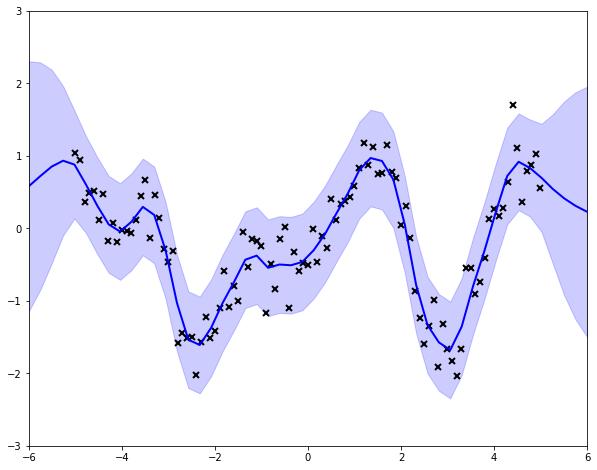

In [10]:
plt.figure(figsize=(10,8))
xx = np.linspace(-6, 6).reshape(-1,1)

def plot(m):
    mean, var = m.predict_y(xx)
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx, mean, 'b', lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.xlim(-6, 6)
    plt.ylim(-3, 3)
plot(m)

You might have noticed that there is nothing particularly Bayesian about what we have done here. No priors have been specified, and we have just performed maximum likelihood to obtain a solution.

In [11]:
m.kern.variance.prior = gpflow.priors.Gamma(1,0.1)
m.kern.lengthscales.prior = gpflow.priors.Gamma(1,0.1)

In addition to specifying priors on the hyperparameters, we can also fix values if we have information to justify doing so. For example, we may know the measurement error of our data-collecting instrument, so we can assign that error value as a constant.

In [12]:
m.likelihood.variance = 0.1
m.likelihood.variance.fixed = True

In [13]:
print(m)

name.kern.lengthscales transform:+ve prior:Ga([ 1.],[ 0.1])
[ 1.04159852]
name.kern.variance transform:+ve prior:Ga([ 1.],[ 0.1])
[ 0.86636739]
name.likelihood.variance transform:+ve prior:None [FIXED]
[ 0.1]



In [14]:
m.optimize()

      fun: 63.930638821012913
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  8.13287712e-07,  -3.35442311e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 6
   status: 0
  success: True
        x: array([-0.16326004, -0.75649791])

Though we may feel satisfied that we have a proper Bayesian model, the end result is very much the same. All we have done is added the log-probabilities of the priors to the model, and performed optimization again. This time, the result is a maximum *a posteriori* (MAP) estimate.

In [15]:
print(m)

name.kern.lengthscales transform:+ve prior:Ga([ 1.],[ 0.1])
[ 0.6148462]
name.kern.variance transform:+ve prior:Ga([ 1.],[ 0.1])
[ 0.38479193]
name.likelihood.variance transform:+ve prior:None [FIXED]
[ 0.1]



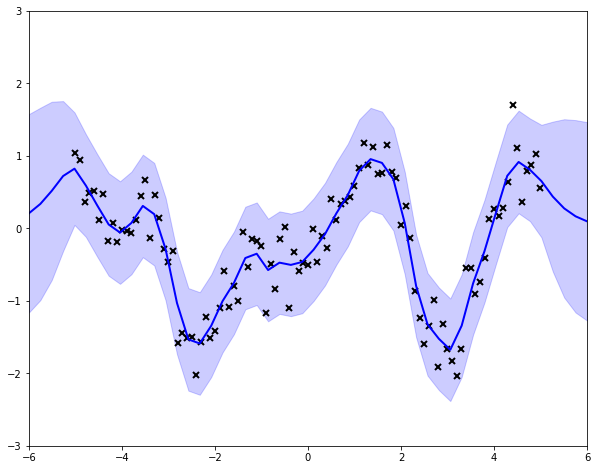

In [16]:
plt.figure(figsize=(10,8))
def plot(m):
    mean, var = m.predict_y(xx)
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx, mean, 'b', lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.xlim(-6, 6)
    plt.ylim(-3, 3)
plot(m)

To perform a "Fully Bayesian" analysis, we can use the more general `GPMC` class, which jointly samples over the parameters and the functions. For this, we need to specify a likelihood as well as priors for the kernel parameters. Let's change the model slightly and use a Student's T likelihood, which will be more robust to the influence of extreme values.

In [17]:
l = gpflow.likelihoods.StudentT()
m = gpflow.gpmc.GPMC(X, Y, kern=k, likelihood=l)

In [18]:
m.kern.variance.prior = gpflow.priors.Gamma(1,1)
m.kern.lengthscales.prior = gpflow.priors.Gamma(1,1)

Rather than optimize, we fit the GPMC model using the sample method. This will employ Hamiltonian Monte Carlo (HMC), an efficient form of Markov chain Monte Carlo that takes advantage of gradient information to improve posterior sampling. The TensorFlow library provides automatic differentiation functions that allow the gradient to be calculated for arbitrary models. The HMC algorithm requires the specification of hyperparameter values that determine the behavior of the sampling procedure; these parameters can be tuned.

In [19]:
trace = m.sample(1000, verbose=True, epsilon=0.03, Lmax=15)

Iteration:  100 	 Acc Rate:  96.0 %
Iteration:  200 	 Acc Rate:  93.0 %
Iteration:  300 	 Acc Rate:  94.0 %
Iteration:  400 	 Acc Rate:  95.0 %
Iteration:  500 	 Acc Rate:  93.0 %
Iteration:  600 	 Acc Rate:  96.0 %
Iteration:  700 	 Acc Rate:  95.0 %
Iteration:  800 	 Acc Rate:  96.0 %
Iteration:  900 	 Acc Rate:  95.0 %
Iteration:  1000 	 Acc Rate:  95.0 %


We end up with a trace containing sampled values from the kernel parameters, which can be plotted to get an idea about the posterior uncertainty in their values, after being informed by the data.

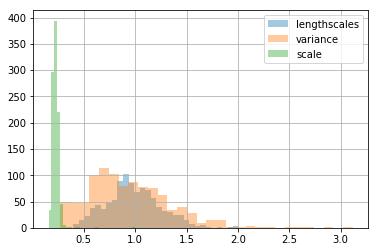

In [20]:
parameter_samples = m.get_samples_df(trace)

for col in parameter_samples.columns.sort_values()[1:]:
    parameter_samples[col].hist(label=col.split('.')[-1], alpha=0.4, bins=30)
    
plt.legend()

We can then go back and generate predictions from the posterior GP, and plot several of them to get an idea of the predicted underlying function.

In [21]:
realizations = []
for sample in trace[-100:]:
    m.set_state(sample)
    realizations.append(m.predict_f_samples(xx, 1).squeeze())
realizations = np.vstack(realizations)

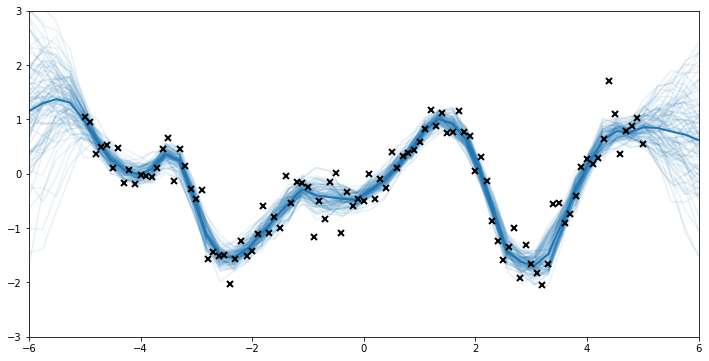

In [22]:
plt.figure(figsize=(12, 6))
line, = plt.plot(xx.squeeze(), np.mean(realizations, 0), lw=2)
for draw in realizations:
    plt.plot(xx.squeeze(), draw, color=line.get_color(), alpha = 0.1)
plt.plot(X, Y, 'kx', mew=2)
plt.xlim(-6, 6)
plt.ylim(-3, 3);

## Multi-task GP

Lets create a dataset with two outputs, correlated, heavy-tail noise. One has more noise than the other.

In [23]:
X1 = np.random.rand(100, 1)
X2 = np.random.rand(50, 1) * 0.5
Y1 = np.sin(6*X1) + np.random.standard_t(3, X1.shape)*0.03
Y2 = np.sin(6*X2+ 0.7) + np.random.standard_t(3, X2.shape)*0.1

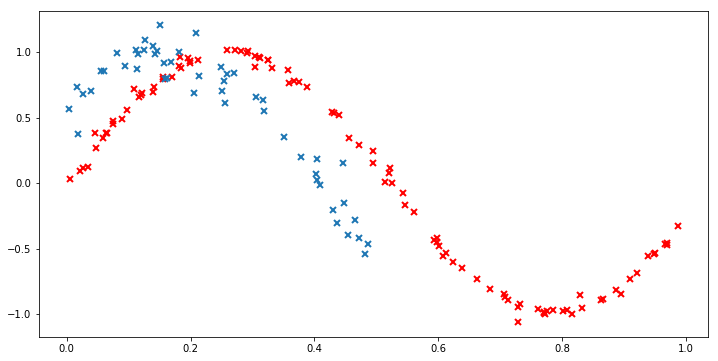

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(X1, Y1, 'rx', mew=2)
plt.plot(X2, Y2, 'x', mew=2)

Lets use the same strategy as Bonilla et al.. 

In [61]:
# build a variational model
lik = gpflow.likelihoods.SwitchedLikelihood([gpflow.likelihoods.StudentT(), gpflow.likelihoods.StudentT()])
k1 = gpflow.kernels.Matern32(1)
coreg = gpflow.kernels.Coregion(1, output_dim=2, rank=1, active_dims=[1])
kern = k1 * coreg
X_augmented = np.vstack((np.hstack((X1, np.zeros_like(X1))), np.hstack((X2, np.ones_like(X2)))))
Y_augmented = np.vstack((np.hstack((Y1, np.zeros_like(X1))), np.hstack((Y2, np.ones_like(X2)))))

In [62]:
#m = gpflow.vgp.VGP(X_augmented, Y_augmented, kern=kern, likelihood=lik, num_latent=1)
#m = gpflow.gpr.GPR(X_augmented, Y_augmented,
#                     kern=kern)
m = gpflow.svgp.SVGP(X_augmented, Y_augmented,
                     kern=kern, likelihood=lik, num_latent=1,
                     Z=X_augmented[::3].copy())

(-2, 2)

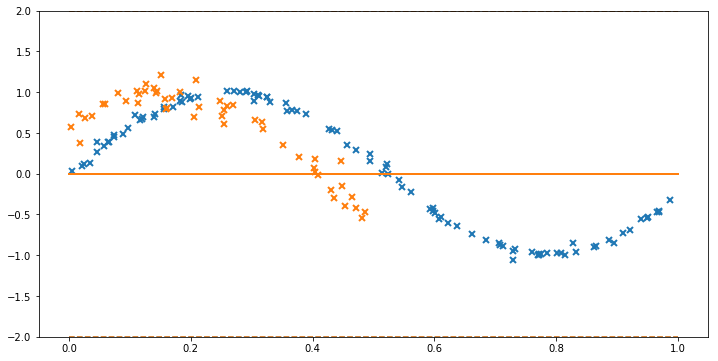

In [63]:
plt.figure(figsize=(12, 6))
xtest = np.linspace(0, 1, 100)[:,None]
line, = plt.plot(X1, Y1, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

line, = plt.plot(X2, Y2, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

plt.ylim(-2, 2)

In [64]:
 m.optimize(max_iters=500)

C:\Users\mpimentel\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\mpimentel\Anaconda3\lib\site-packages\gpflow\model.py:317: VisibleDeprecationWarning: Use `maxiter` instead of deprecated `max_iters`.
  warnings.warn("Use `maxiter` instead of deprecated `max_iters`.", np.VisibleDeprecationWarning)


      fun: -172.77933010961848
 hess_inv: <1433x1433 LbfgsInvHessProduct with dtype=float64>
      jac: array([  8.20412159e+01,  -0.00000000e+00,  -2.23922239e+01, ...,
        -8.19102742e-05,  -8.86750967e-03,   5.87354993e-02])
  message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
     nfev: 582
      nit: 501
   status: 1
  success: False
        x: array([ 0.41768766,  0.        ,  0.6242215 , ...,  0.00457771,
        0.00448898,  0.82303817])

In [65]:
m.kern

(-2, 2)

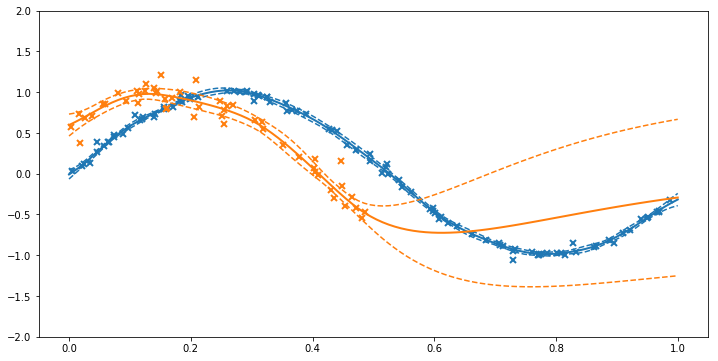

In [66]:
plt.figure(figsize=(12, 6))
xtest = np.linspace(0, 1, 100)[:,None]
line, = plt.plot(X1, Y1, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

line, = plt.plot(X2, Y2, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

plt.ylim(-2, 2)

In [67]:
m.kern.coregion.W = np.random.randn(2, 1)

In [68]:
m.optimize()

      fun: -185.07328014960376
 hess_inv: <1433x1433 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.15915894e+01,  -0.00000000e+00,   3.87070179e+00, ...,
         4.82608622e-02,  -3.83031755e-03,  -5.27057329e-02])
  message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
     nfev: 1120
      nit: 1001
   status: 1
  success: False
        x: array([ 0.4282607 ,  0.        ,  0.62248246, ...,  0.07215031,
        0.04451534,  0.81064668])

(-2, 2)

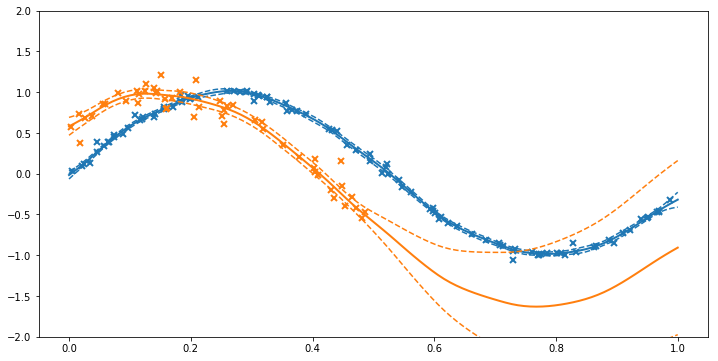

In [69]:
plt.figure(figsize=(12, 6))
xtest = np.linspace(0, 1, 100)[:,None]
line, = plt.plot(X1, Y1, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

line, = plt.plot(X2, Y2, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

plt.ylim(-2, 2)

In [70]:
m.kern

In [78]:
a = 0.67770340
b = -0.004112505

In [83]:
(a*b)

-0.002787058621017